In [86]:
import warnings
warnings.filterwarnings("ignore")

# loading packages

import numpy as np
import pandas as pd
from pandas import datetime
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs

sns.set_style("darkgrid")
%matplotlib inline

## Loading Datasets


In [2]:
train = pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\data\train.csv')
#test = pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\data\test.csv')
store = pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\data\store.csv')

print('train set shape:', train.shape)
#print('test set shape:', test.shape)
print('store set shape:', store.shape)

train set shape: (1017209, 9)
store set shape: (1115, 10)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We are going to join the datasets, we will perform an inner join 

In [7]:
# merge the train with the stores set
train_store = pd.merge(left = train, right = store, how = 'inner', left_on = 'Store', right_on = 'Store')
print(train_store.shape)
#print(test_store.shape)

(1017209, 18)


In [8]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(train_store)

The telecom dataset contains 11.87 % missing values.


In [ ]:
train_store.isna().sum()

as part of prepocessing we will generate new columns for the date. we will unpark every part of the date into a new column this will help in ploting.

In [10]:
def feature_generation(data):
    data['Date'] = pd.to_datetime(data.Date)
    data['Month'] = data.Date.dt.month.to_list()
    data['Year'] = data.Date.dt.year.to_list()
    data['Day'] = data.Date.dt.day.to_list()
    data['WeekOfYear'] = data.Date.dt.weekofyear.to_list()
    data['DayOfWeek'] = data.Date.dt.dayofweek.to_list()
    data['weekday'] = 1        # Initialize the column with default value of 1
    data.loc[data['DayOfWeek'] == 5, 'weekday'] = 0
    data.loc[data['DayOfWeek'] == 6, 'weekday'] = 0
#         data = data.drop(['Date'], axis = 1)
        
    return data

In [ ]:
train_dup = train_store.copy()
train_dup

In [ ]:
train_dup=feature_generation(train_dup) 
train_dup 

In [13]:
def fill_null(df,col:str,parameter):
    df[col]=df[col].fillna(df[col].paremeter())
    return df[col]

In [14]:
for col in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']:
    train_dup[col] = train_dup[col].fillna((int(train_dup[col].mean()))) 



In [15]:
train_dup['PromoInterval'] = train_dup['PromoInterval'].fillna(train_dup['PromoInterval'].mode()[0])

In [16]:
train_dup.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,2.998341,1.997391,0.0,1.0,3.0,5.0,6.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,5430.085430,7705.297659,20.0,710.0,2330.0,6880.0,75860.0
CompetitionOpenSinceMonth,1017209.0,7.152022,2.654703,1.0,6.0,7.0,9.0,12.0
CompetitionOpenSinceYear,1017209.0,2008.470820,4.959791,1900.0,2008.0,2008.0,2011.0,2015.0


Text(0.5, 1.0, 'Average sales per month')

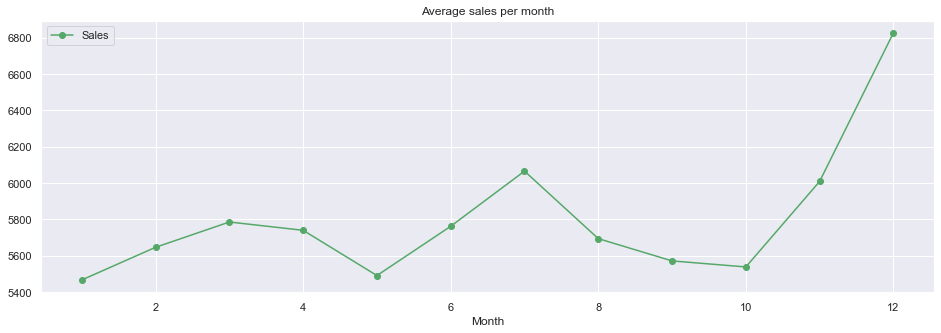

In [44]:
axis = train_dup.groupby('Month')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'g')
axis.set_title('Average sales per month')

Text(0.5, 1.0, 'Average clients per month')

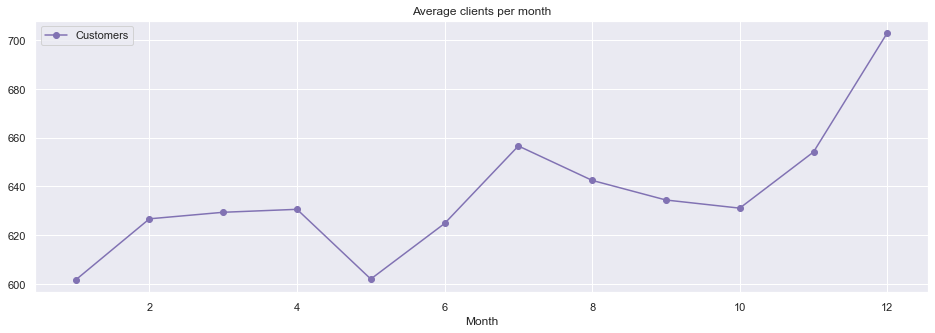

In [46]:
axis = train_dup.groupby('Month')[['Customers']].mean().plot(figsize = (16,5), marker = 'o', color = 'm')
axis.set_title('Average clients per month')

Text(0.5, 1.0, 'Average Sales per Day')

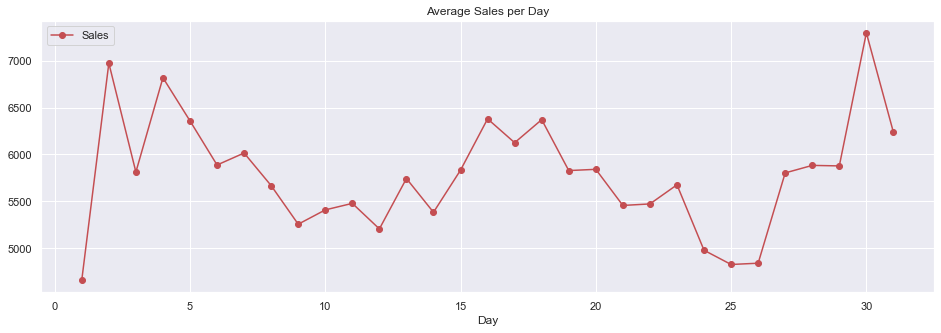

In [47]:
axis = train_dup.groupby('Day')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'r')
axis.set_title('Average Sales per Day')

Text(0.5, 1.0, 'Average clients per day')

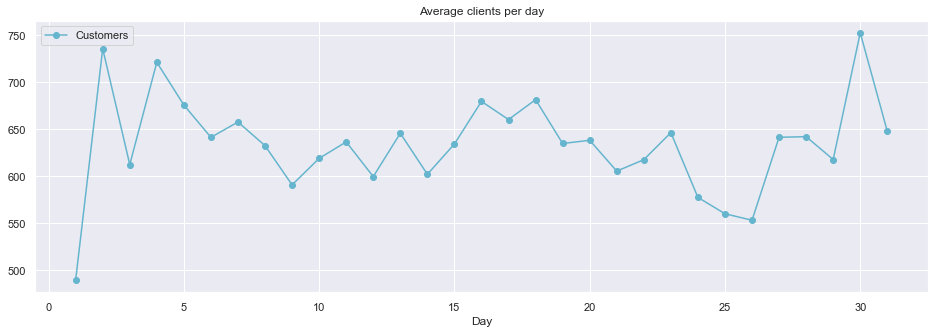

In [48]:
axis = train_dup.groupby('Day')[['Customers']].mean().plot(figsize = (16,5), marker = 'o', color = 'c')
axis.set_title('Average clients per day')

Text(0.5, 1.0, 'Average sales per day of the week')

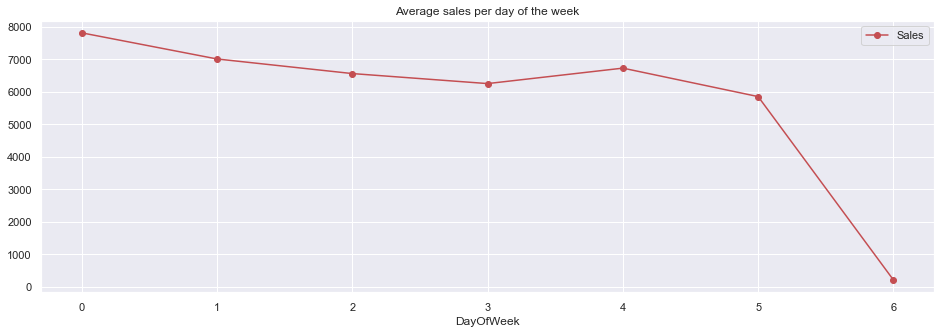

In [49]:
axis = train_dup.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'r')
axis.set_title('Average sales per day of the week')

Text(0.5, 1.0, 'Average customers per day of the week')

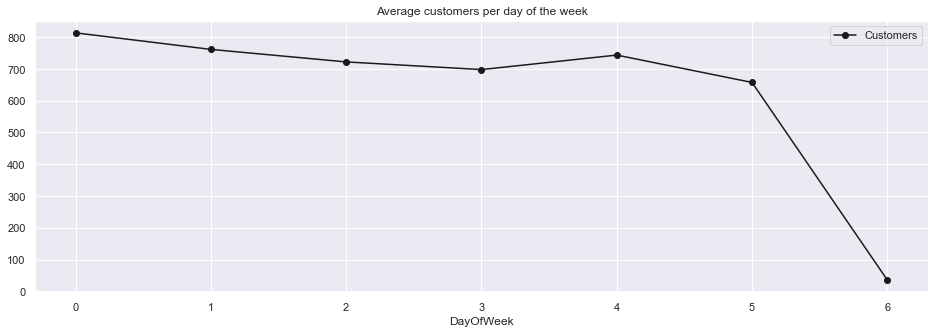

In [50]:
axis = train_dup.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (16,5), marker = 'o', color = 'k')
axis.set_title('Average customers per day of the week')

<AxesSubplot:xlabel='Date'>

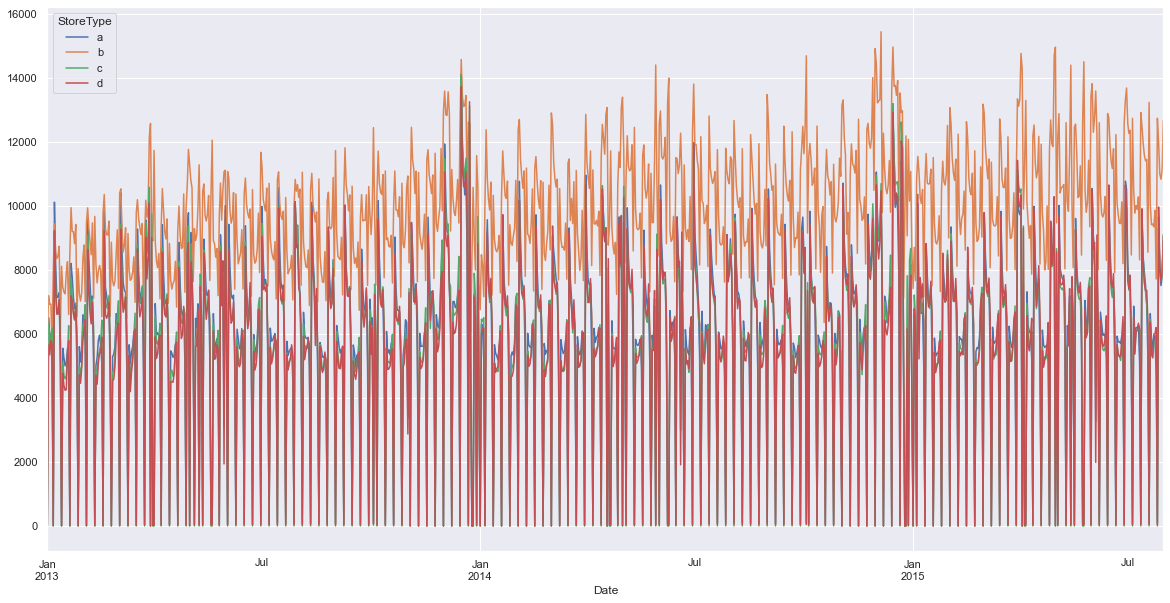

In [51]:
fig, ax = plt.subplots(figsize = (20,10))
train_dup.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

In [72]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

Checking for sales and customer behaviour during holidays and ordinary days.

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
so we first plot holiday plot and count how many are 0 , a , b, c 

then we plot a bar graph for Holidays and sales , where holiday is not equal to 0 and sales are greater than 0 

we will use the same thinking on ploting the customer column and holiday , we will plot where holiday is not equaal to 0 and customer is greater than on 

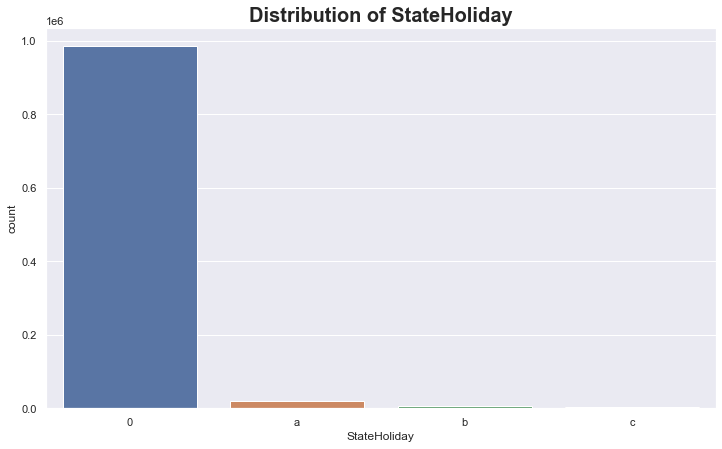

In [53]:
train_dup["StateHoliday"].loc[train_dup["StateHoliday"] == 0] = "0"
plot_count(train_dup,'StateHoliday')

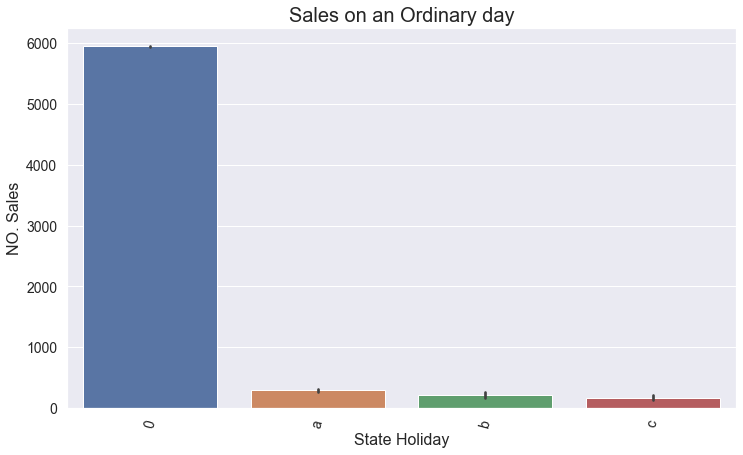

In [68]:
plot_bar(train_dup,'StateHoliday','Sales','Sales on an Ordinary day','State Holiday','NO. Sales')

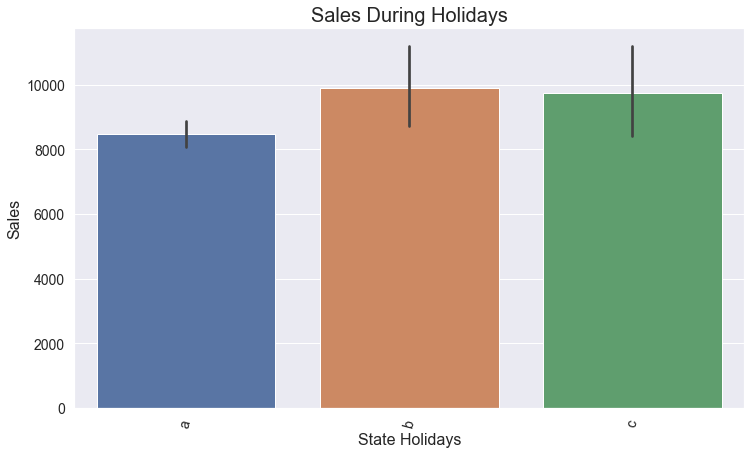

In [54]:
holiday = (train_dup["StateHoliday"] != "0") & (train_dup["Sales"] > 0)
plot_bar(train_dup[holiday],'StateHoliday','Sales','Sales During Holidays','State Holidays','Sales')

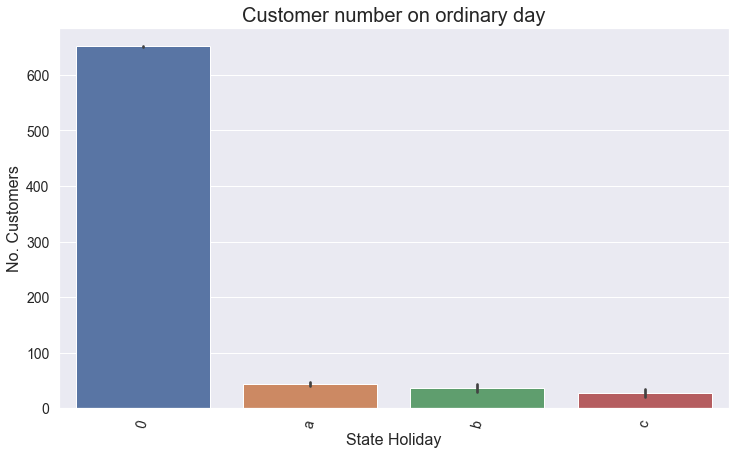

In [69]:
plot_bar(train_dup,'StateHoliday','Customers','Customer number on ordinary day','State Holiday','No. Customers')

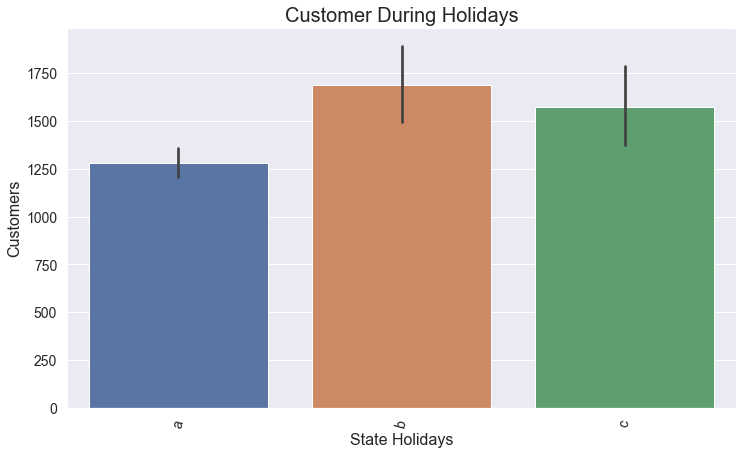

In [65]:
holiday = (train_dup["StateHoliday"] != "0") & (train_dup["Customers"] > 0)
plot_bar(train_dup[holiday],'StateHoliday','Customers','Customer During Holidays','State Holidays','Customers')

●	Check how the storetype type affects sales(bar plot)

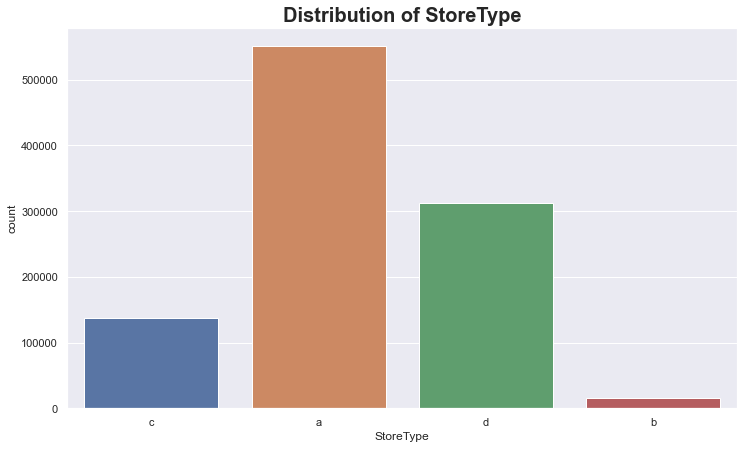

In [75]:
plot_count(train_dup,'StoreType')

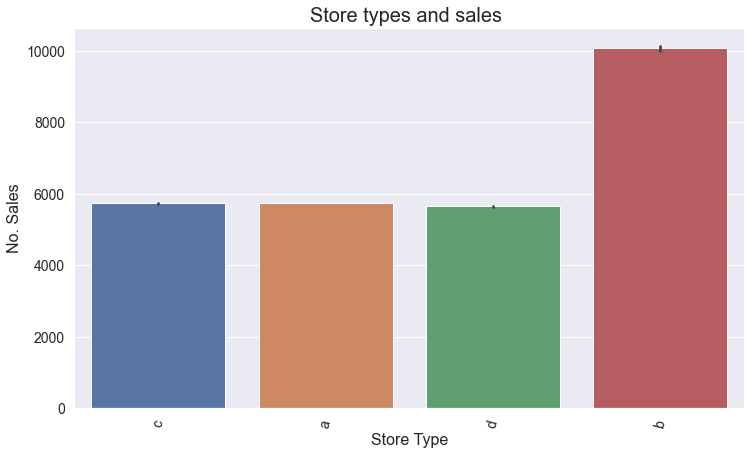

In [76]:
plot_bar(train_dup,'StoreType','Sales','Store types and sales ','Store Type','No. Sales',)

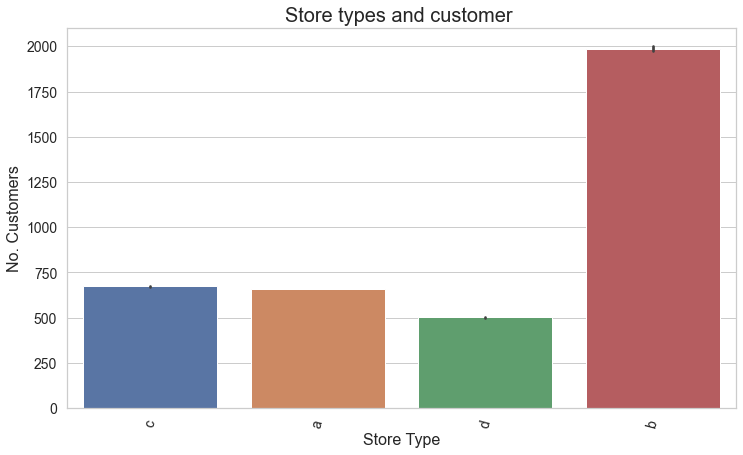

In [83]:
plot_bar(train_dup,'StoreType','Customers','Store types and customer ','Store Type','No. Customers',)

●	How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

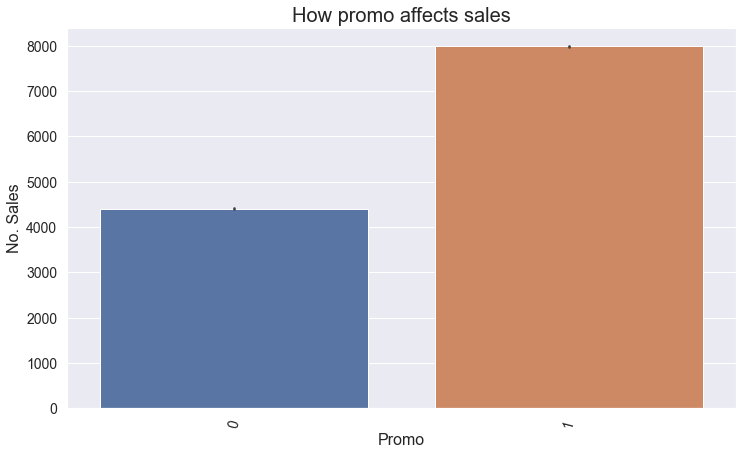

In [73]:
plot_bar(train_dup,'Promo','Sales','How promo affects sales','Promo','No. Sales')

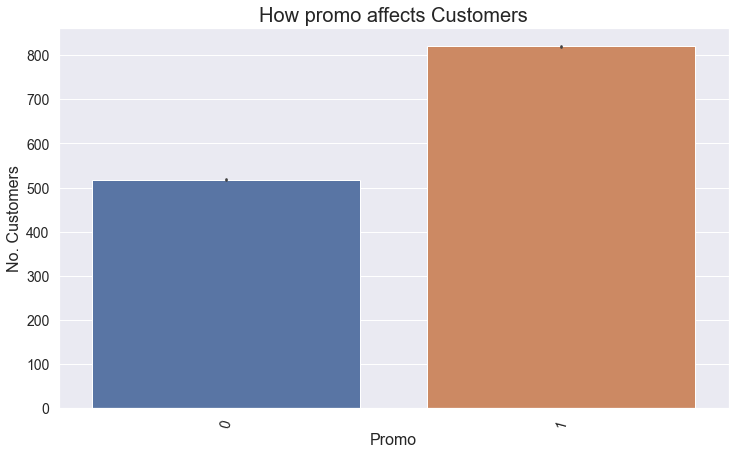

In [74]:
plot_bar(train_dup,'Promo','Customers','How promo affects Customers','Promo','No. Customers')


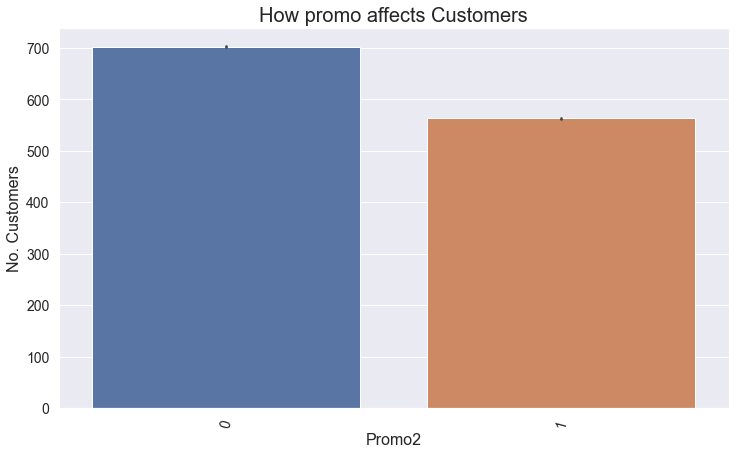

In [77]:
plot_bar(train_dup,'Promo2','Customers','How promo affects Customers','Promo2','No. Customers')


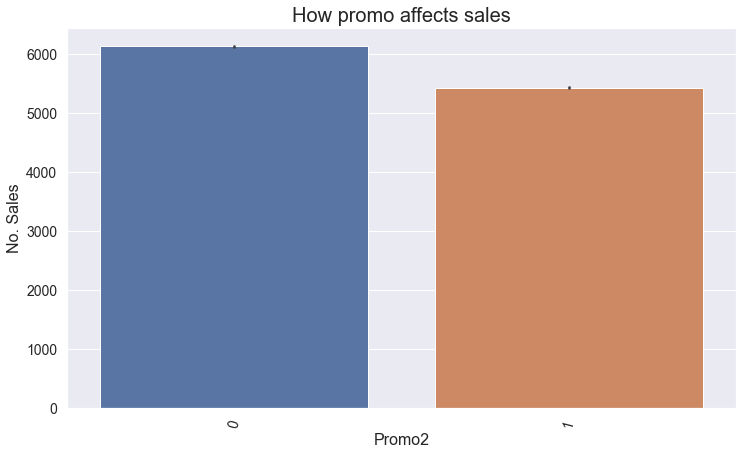

In [78]:
plot_bar(train_dup,'Promo2','Sales','How promo affects sales','Promo2','No. Sales')

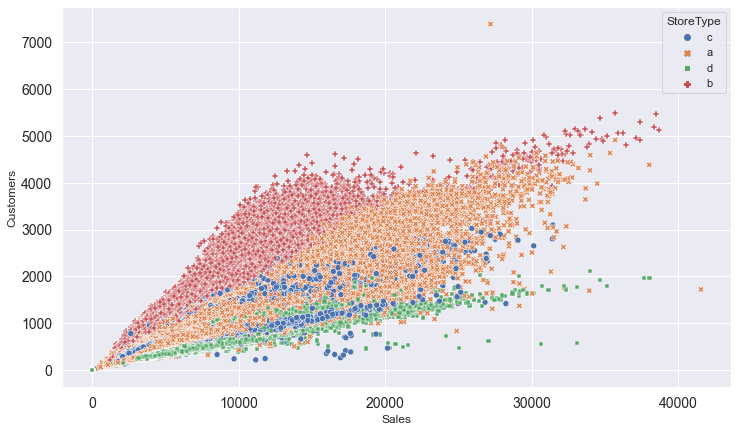

In [87]:
plot_scatter(train_dup,'Sales','Customers','','StoreType','StoreType')

●	Which stores are opened on all weekdays? How does that affect their sales on weekends? 

Text(0.5, 1.0, "store's open status in relation to day of the week")

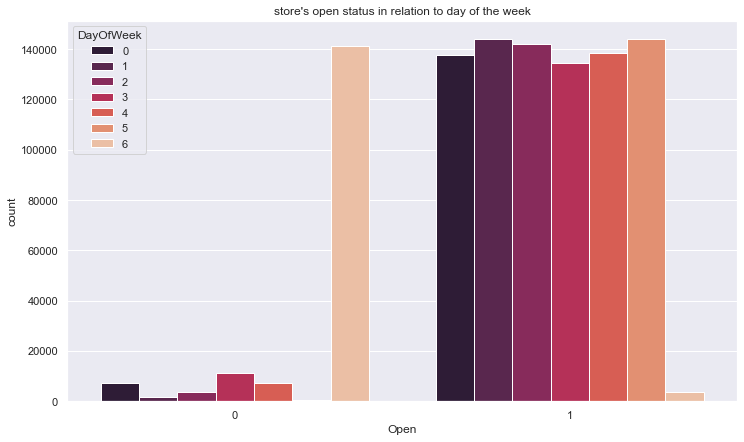

In [94]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Open',hue='DayOfWeek', data=train_dup, palette = 'rocket')
plt.title("store's open status in relation to day of the week")

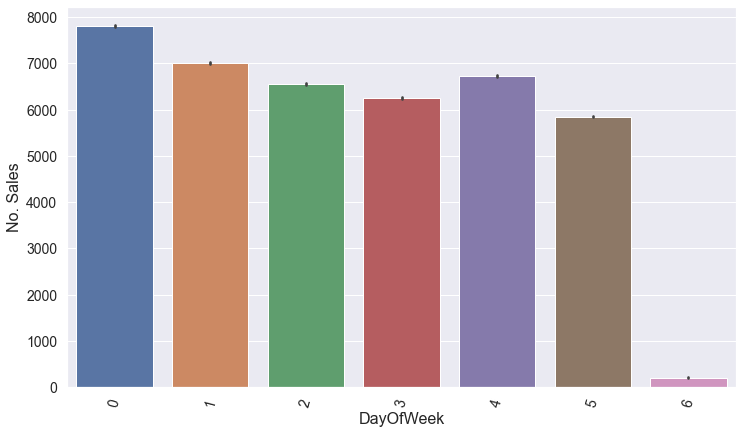

In [95]:
plot_bar(train_dup,'DayOfWeek','Sales','','DayOfWeek','No. Sales')

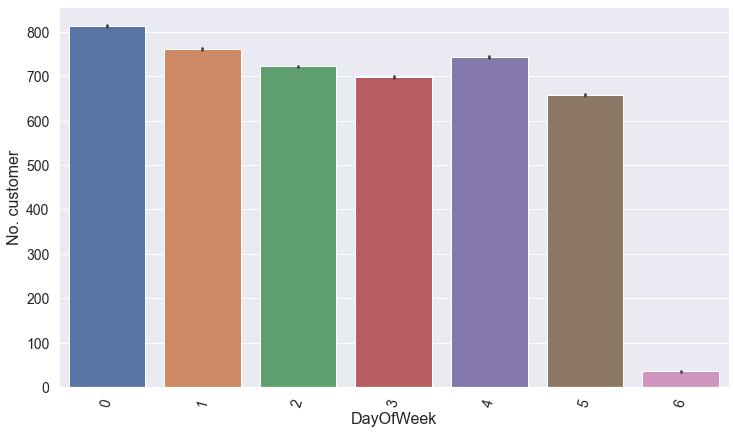

In [97]:
plot_bar(train_dup,'DayOfWeek','Customers','','DayOfWeek','No. customer')


●	Check how the assortment type affects sales(bar plot)


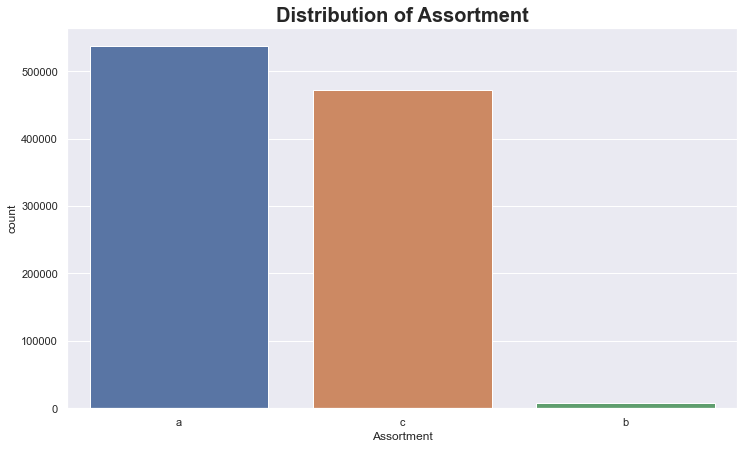

In [88]:
plot_count(train_dup,'Assortment')

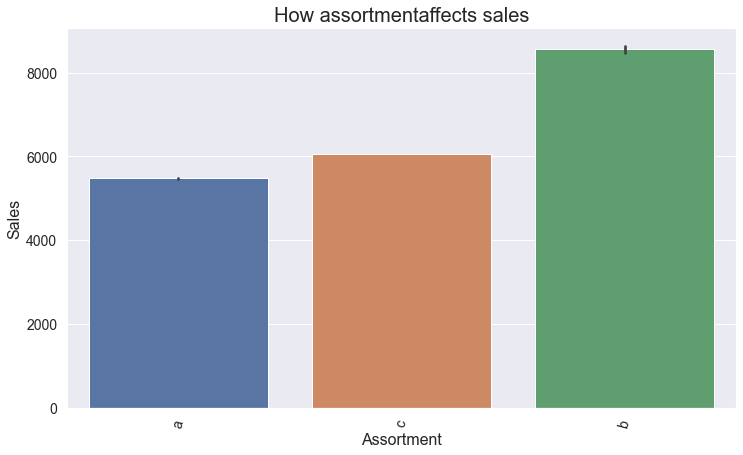

In [89]:
plot_bar(train_dup,'Assortment','Sales','How assortment affects sales','Assortment','Sales',)

## Seasonality

For use to check for seasonality we are going to use the .resample() function on the date and on the mean of our sales column 

e.g # Resampling the time series data based on months ,we apply it on stock close price 'M' indicates month like below

  ## monthly_resampled_data = df.close.resample('M').mean()
  
the above command will find the mean closing price ,of each month for a duration of 12 months.

in our case we resample our date column with our sales column 

Most commonly used time series frequency are –
W : weekly frequency
M : month end frequency
SM : semi-month end frequency (15th and end of month)
Q : quarter end frequency

source of resampling info : https://www.geeksforgeeks.org/python-pandas-dataframe-resample/


In [ ]:
season = train_dup.copy()
season

In [ ]:
season= season.set_index('Date')
season

In [107]:
season.drop(season.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]], axis = 1, inplace = True)
  
season

,Sales
Date,
2015-07-31,5263
2015-07-30,5020
2015-07-29,4782
2015-07-28,5011
2015-07-27,6102
...,...
2013-01-05,4771
2013-01-04,4540
2013-01-03,4297


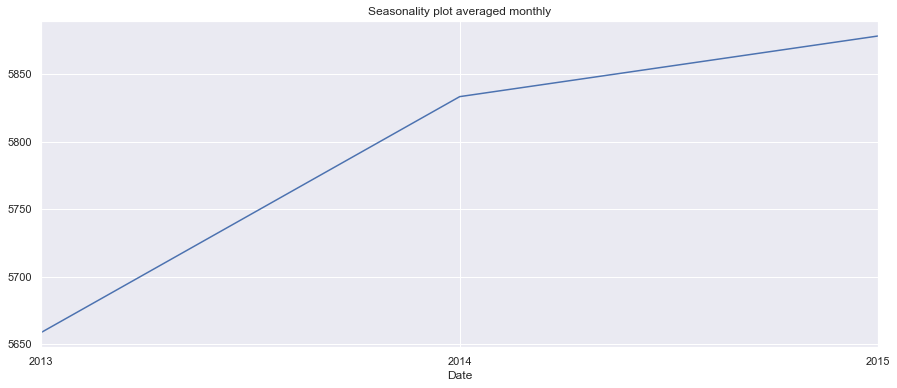

In [111]:
year = season.Sales.resample('Y').mean()
year.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged yearly')
plt.show()

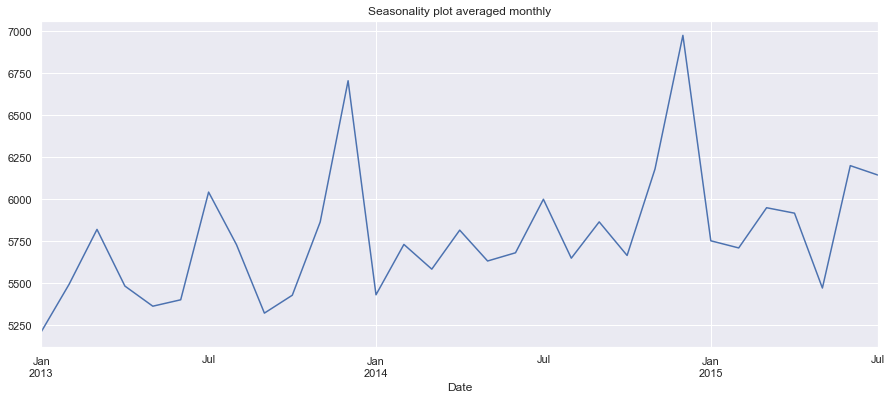

In [109]:
monthly = season.Sales.resample('M').mean()
monthly.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged monthly')
plt.show()

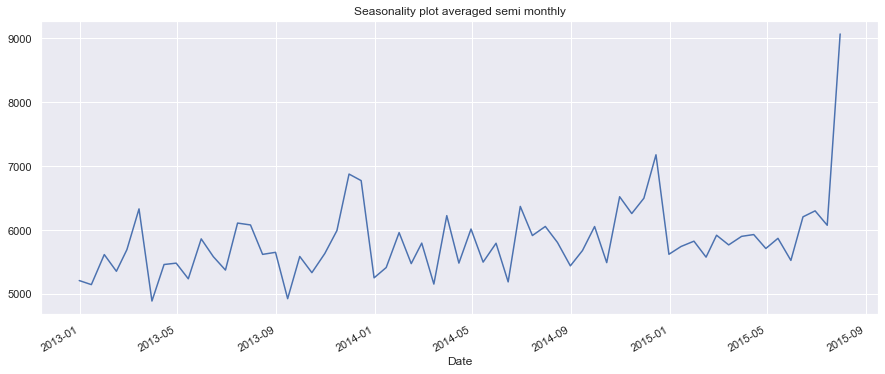

In [112]:
semi_monthly = season.Sales.resample('sM').mean()
semi_monthly.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged semi monthly')
plt.show()

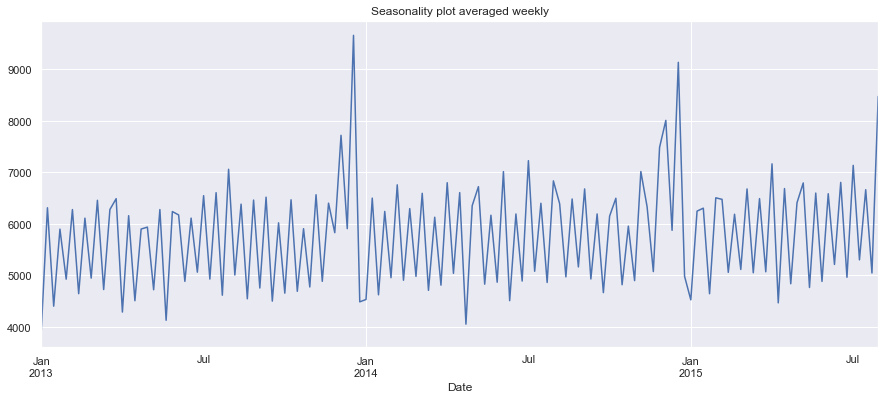

In [110]:
week = season.Sales.resample('W').mean()
week.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged weekly')
plt.show()

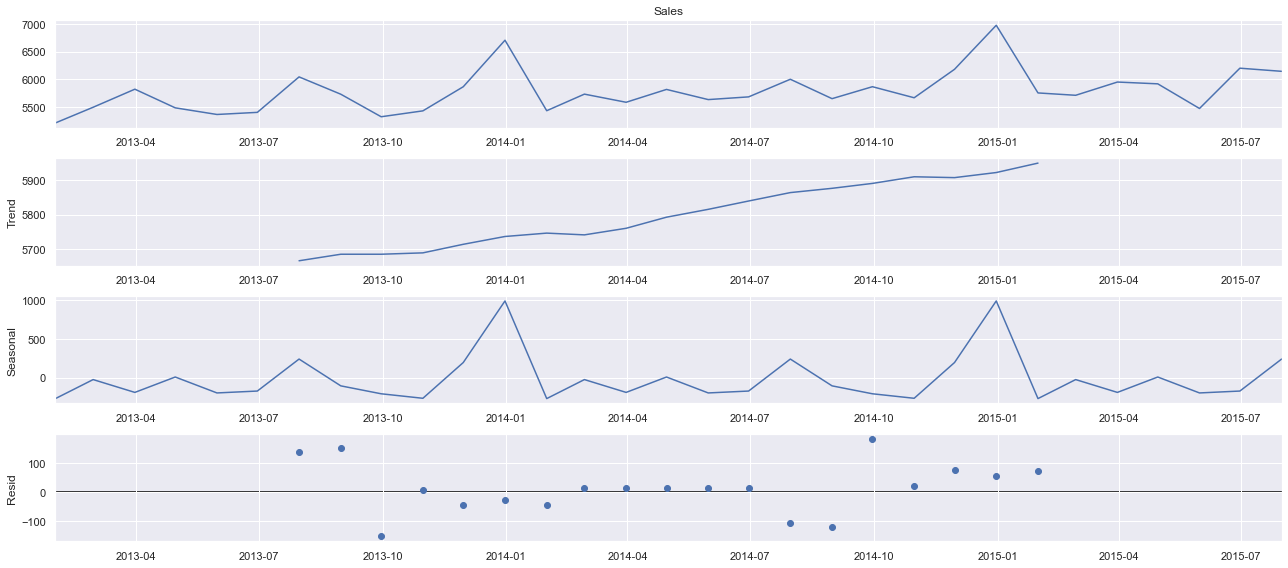

In [114]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
plt.show()